In [1]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
#cross validation
from sklearn.model_selection import StratifiedKFold
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

from scipy import stats

## importing dataset

In [2]:
df=pd.read_csv('heart_disease.csv')

## looking at the first five rows of dataset

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## updating column names

In [4]:
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholestrol','fasting_blood_sugar','resting_ecg','max_heart_rate','excercise_angina','oldpeak','st_slope','target']

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## applying values at sex columns creating categorical values as male and female by applying lambda function

In [6]:
df['sex']=df.sex.apply(lambda x: 'male' if x==1 else 'female')

In [7]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,male,2,140,289,0,0,172,0,0.0,1,0
1,49,female,3,160,180,0,0,156,0,1.0,2,1
2,37,male,2,130,283,0,1,98,0,0.0,1,0
3,48,female,4,138,214,0,0,108,1,1.5,2,1
4,54,male,3,150,195,0,0,122,0,0.0,1,0


## now creating categorical values in chest pain type column

In [8]:
df['chest_pain_type'][df['chest_pain_type']==1]='typical angina'
df['chest_pain_type'][df['chest_pain_type']==2]='atypical angina'
df['chest_pain_type'][df['chest_pain_type']==3]='non-anginal pain'
df['chest_pain_type'][df['chest_pain_type']==4]='asymptotic'

<ipython-input-8-76873f1d671f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type']==1]='typical angina'


## looking for unique values in the columns

In [9]:
df['excercise_angina'].unique()

array([0, 1], dtype=int64)

In [10]:
df['resting_ecg'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
df['st_slope'].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
df['resting_ecg'][df['resting_ecg'] == 0] = 'normal'
df['resting_ecg'][df['resting_ecg'] == 1] = 'ST-T wave abnormality'
df['resting_ecg'][df['resting_ecg'] == 2] = 'left ventricular hypertrophy'

<ipython-input-12-41db048a8531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting_ecg'][df['resting_ecg'] == 0] = 'normal'
<ipython-input-12-41db048a8531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting_ecg'][df['resting_ecg'] == 1] = 'ST-T wave abnormality'
<ipython-input-12-41db048a8531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting_ecg'][df['resting_ecg'] == 2] = 'left ventricular hypertrophy'


In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,1,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,2,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,1,0
3,48,female,asymptotic,138,214,0,normal,108,1,1.5,2,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,1,0


In [14]:
df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

<ipython-input-14-7d7159514acb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st_slope'][df['st_slope'] == 1] = 'upsloping'


In [15]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptotic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [16]:
df['chest_pain_type'].value_counts()

asymptotic          625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [17]:
df['resting_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: resting_ecg, dtype: int64

In [18]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [19]:
df.drop(df[df.st_slope==0].index,inplace=True)

In [20]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [21]:
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholestrol                0
fasting_blood_sugar       0
resting_ecg               0
max_heart_rate            0
excercise_angina          0
oldpeak                   0
st_slope                  0
target                    0
dtype: int64

In [22]:
df.shape

(1189, 12)

In [23]:
df.describe()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1189 non-null   int64  
 1   sex                     1189 non-null   object 
 2   chest_pain_type         1189 non-null   object 
 3   resting_blood_pressure  1189 non-null   int64  
 4   cholestrol              1189 non-null   int64  
 5   fasting_blood_sugar     1189 non-null   int64  
 6   resting_ecg             1189 non-null   object 
 7   max_heart_rate          1189 non-null   int64  
 8   excercise_angina        1189 non-null   int64  
 9   oldpeak                 1189 non-null   float64
 10  st_slope                1189 non-null   object 
 11  target                  1189 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 120.8+ KB


In [25]:
df.describe(include=[np.object])

,sex,chest_pain_type,resting_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptotic,normal,flat
freq,908,625,683,582


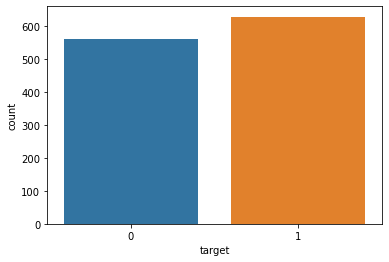

In [26]:
sns.countplot('target',data=df)

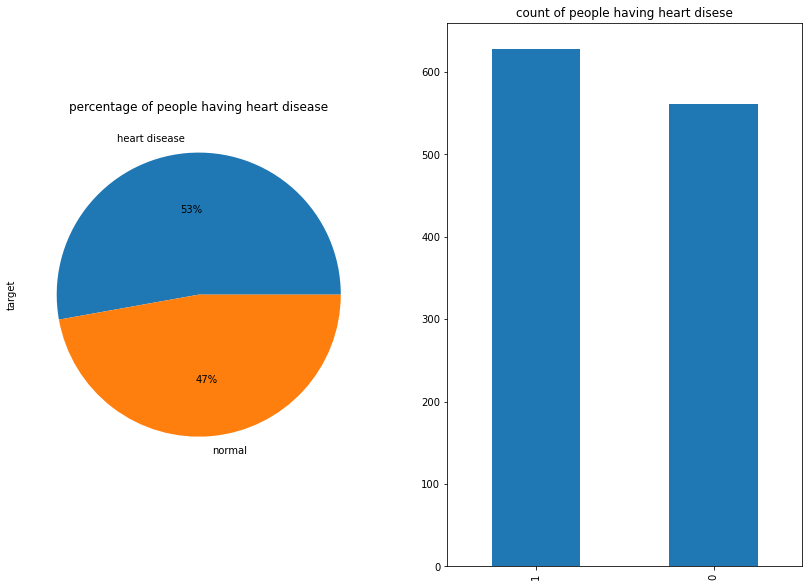

In [27]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,10))
ax1=df['target'].value_counts().plot.pie(x='heart disease',y='no of patients',autopct = "%1.0f%%",
                                         labels=['heart disease','normal'],ax=ax1)
ax1.set(title='percentage of people having heart disease')
ax2=df['target'].value_counts().plot(kind='bar',ax=ax2)
ax2.set(title='count of people having heart disese')
plt.show()

In [28]:
df['age'].dtype

dtype('int64')

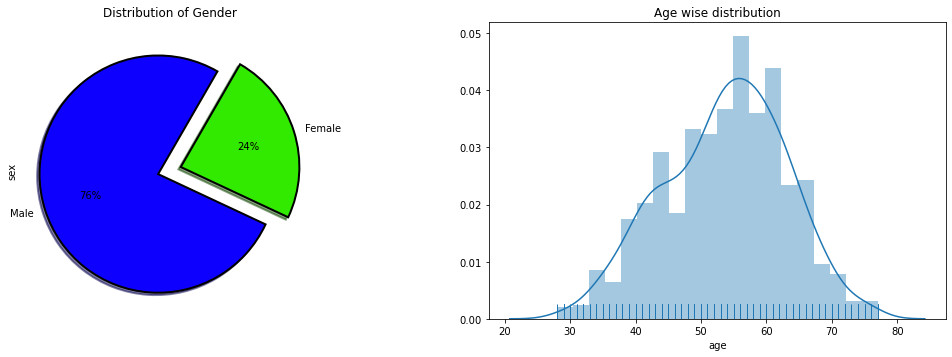

In [29]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()


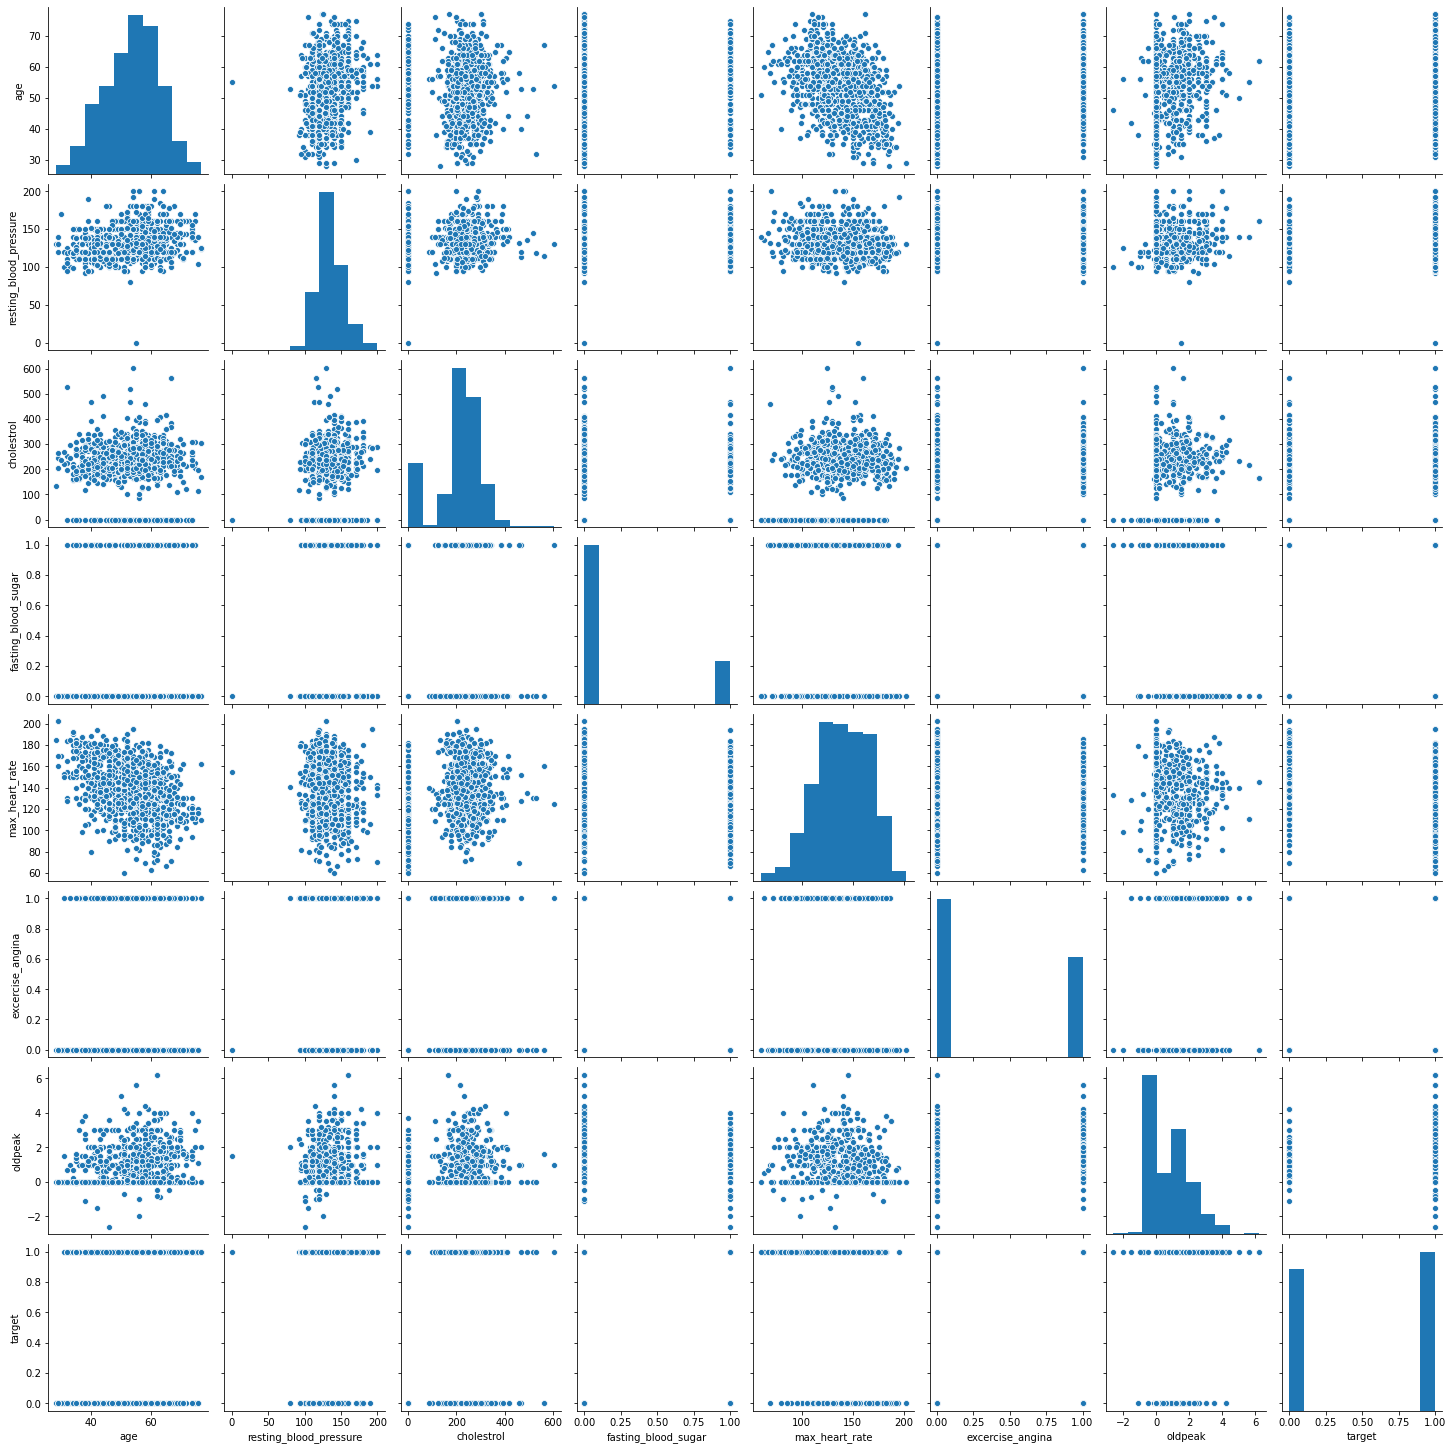

In [30]:
sns.pairplot(df)

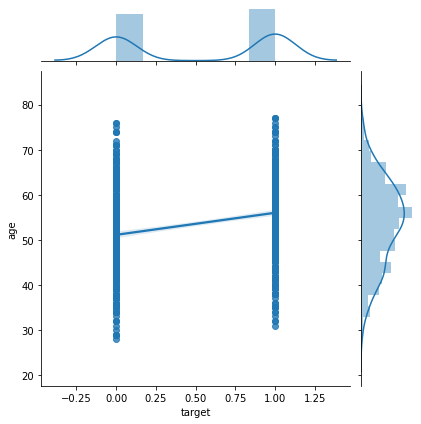

In [31]:
sns.jointplot('target','age',data=df,kind='reg')

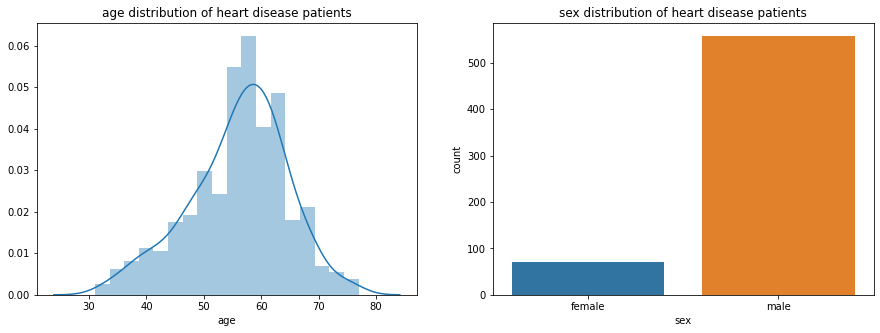

In [32]:
value1=df[df['target']==1]
value0=df[df['target']==0]
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value1['age'])
plt.title('age distribution of heart disease patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value1['sex'])
plt.title('sex distribution of heart disease patients')
plt.show()

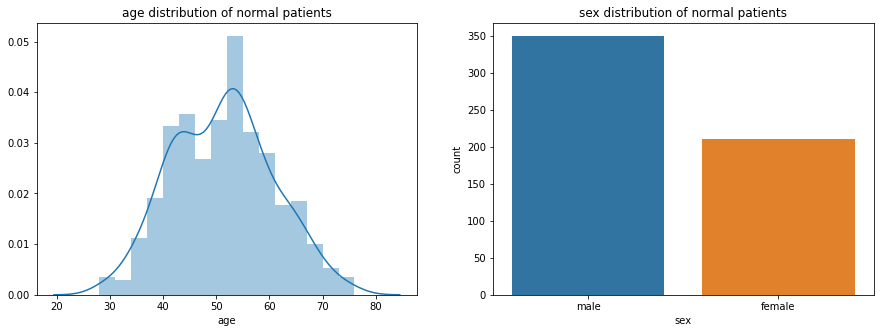

In [33]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value0['age'])
plt.title('age distribution of normal patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value0['sex'])
plt.title('sex distribution of normal patients')
plt.show()

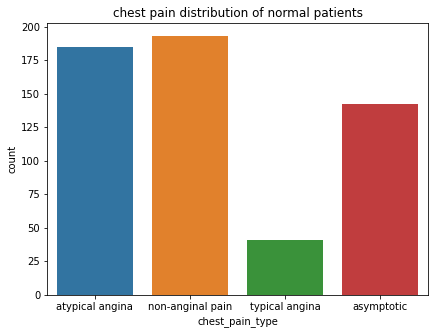

In [34]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(value0['chest_pain_type'])
plt.title('chest pain distribution of normal patients')
plt.show()

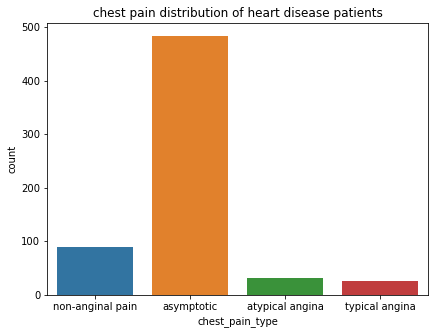

In [35]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(value1['chest_pain_type'])
plt.title('chest pain distribution of heart disease patients')
plt.show()

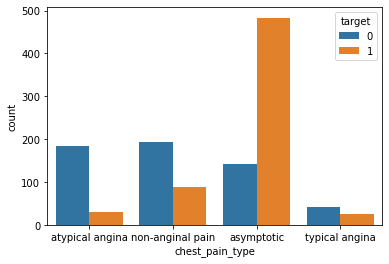

In [36]:
sns.countplot('chest_pain_type',data=df,hue='target')

In [37]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptotic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


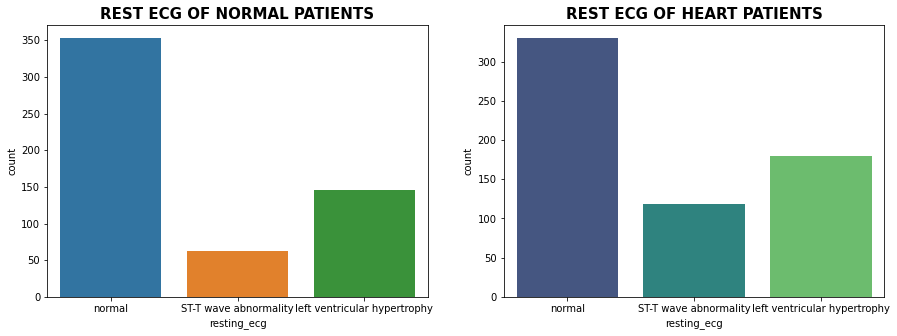

In [38]:

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(value0['resting_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(value1['resting_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

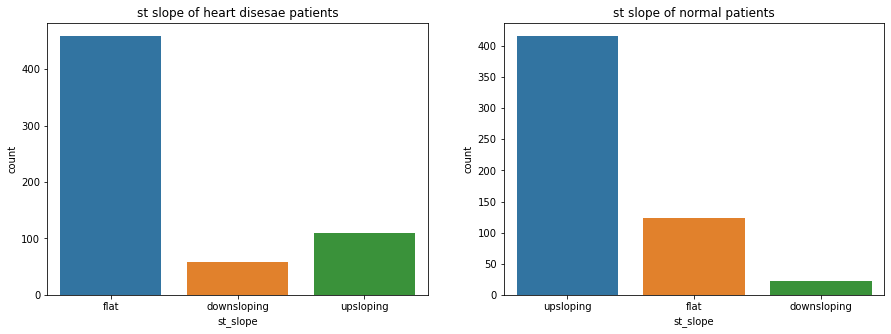

In [39]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(value1['st_slope'])
plt.title('st slope of heart disesae patients')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(value0['st_slope'])
plt.title('st slope of normal patients')

plt.show()

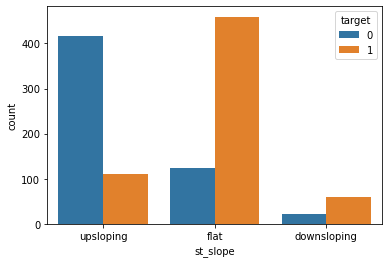

In [40]:
sns.countplot('st_slope',data=df,hue='target')

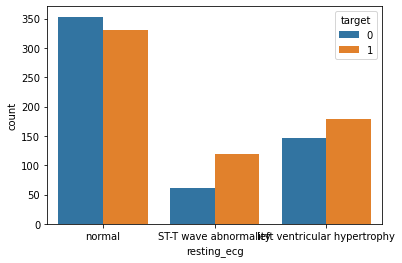

In [41]:
sns.countplot('resting_ecg',data=df,hue='target')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


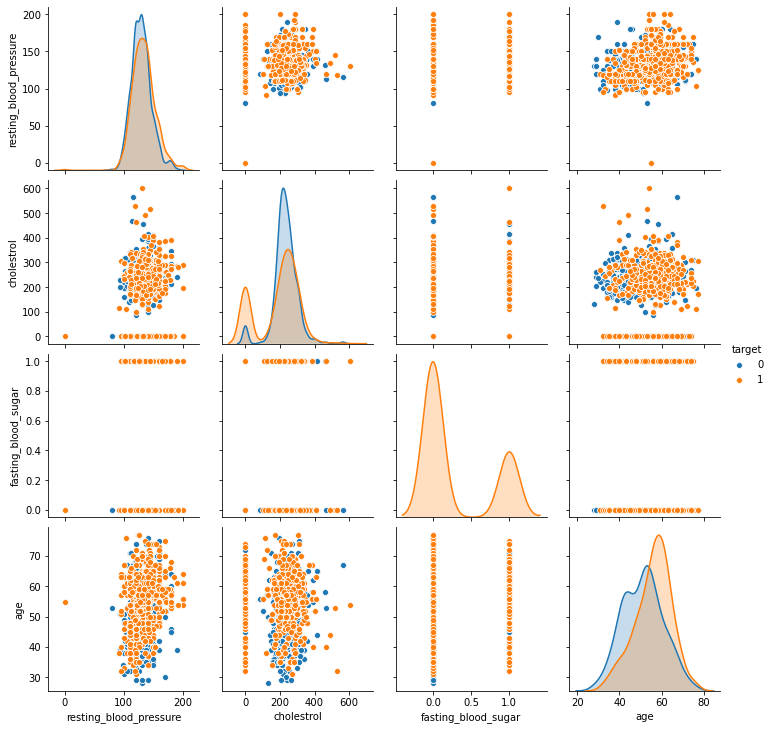

In [42]:
sns.pairplot(df,hue='target',vars=['resting_blood_pressure','cholestrol','fasting_blood_sugar','age'])

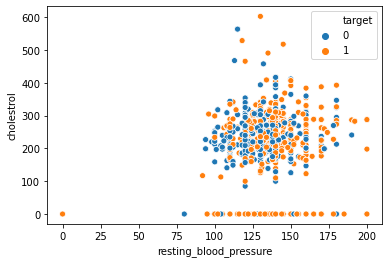

In [43]:
sns.scatterplot(x='resting_blood_pressure',y='cholestrol',hue='target',data=df)

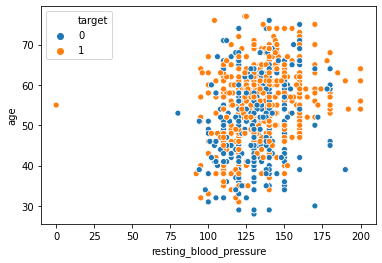

In [44]:
sns.scatterplot(x='resting_blood_pressure',y='age',hue='target',data=df)

In [45]:
df.describe()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [46]:
numeric=df[['age','resting_blood_pressure','cholestrol','fasting_blood_sugar','max_heart_rate','excercise_angina','oldpeak']]

In [47]:
numeric.describe()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000


In [48]:
z=np.abs(stats.zscore(numeric))
z

array([[1.46626567, 0.4281359 , 0.7752277 , ..., 1.26430092, 0.79576489,
        0.85040793],
       [0.5035987 , 1.51737007, 0.29951621, ..., 0.63725935, 0.79576489,
        0.07039621],
       [1.78715466, 0.11648118, 0.71606748, ..., 1.63576637, 0.79576489,
        0.85040793],
       ...,
       [0.35210527, 0.11648118, 0.78265797, ..., 0.96953469, 1.25665258,
        0.25455704],
       [0.35210527, 0.11648118, 0.2526458 , ..., 1.34268112, 0.79576489,
        0.85040793],
       [1.68019167, 0.31921249, 0.34881639, ..., 1.30349102, 0.79576489,
        0.85040793]])

In [49]:
threshold=3
print(np.where(z>3))

(array([  30,   76,  109,  149,  167,  242,  325,  366,  371,  391,  400,
        450,  592,  617,  703,  733,  760,  772,  792,  851,  977, 1009,
       1012, 1038, 1069, 1074, 1077, 1171], dtype=int64), array([2, 2, 1, 2, 6, 1, 6, 1, 4, 4, 1, 1, 1, 2, 6, 1, 1, 6, 6, 6, 6, 6,
       1, 2, 6, 1, 6, 6], dtype=int64))


In [50]:
df=df[(z<3).all(axis=1)]

In [51]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,excercise_angina,oldpeak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptotic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptotic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptotic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [52]:
df.shape

(1161, 12)

In [53]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [54]:
corrmat=df.corr()

In [55]:
corrmat

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
age,1.000000,0.271817,-0.048225,0.179825,-0.381430,0.192054,0.250467,0.266612,0.025084,-0.203428,-0.021979,0.034577,0.136756,-0.209716,0.183076,-0.236594
resting_blood_pressure,0.271817,1.000000,0.103245,0.082198,-0.105161,0.141762,0.157156,0.117937,0.003654,-0.068268,-0.026741,0.070482,0.031461,-0.108588,0.111146,-0.098890
cholestrol,-0.048225,0.103245,1.000000,-0.251544,0.234652,-0.034001,0.043827,-0.203784,-0.213897,0.124712,-0.002571,0.013246,0.211184,-0.070487,-0.051094,0.098272
fasting_blood_sugar,0.179825,0.082198,-0.251544,1.000000,-0.117891,0.049596,0.047855,0.216077,0.115451,-0.115906,-0.014474,0.040430,-0.022756,-0.070468,0.072245,-0.127154
max_heart_rate,-0.381430,-0.105161,0.234652,-0.117891,1.000000,-0.382639,-0.198493,-0.417866,-0.180543,0.231173,0.151978,0.103691,0.120353,0.029610,-0.364223,0.401265
excercise_angina,0.192054,0.141762,-0.034001,0.049596,-0.382639,1.000000,0.385759,0.485125,0.199784,-0.280456,-0.183103,-0.114314,-0.001732,-0.082745,0.365605,-0.426202
oldpeak,0.250467,0.157156,0.043827,0.047855,-0.198493,0.385759,1.000000,0.417427,0.123654,-0.268040,-0.090370,0.044114,0.094224,-0.119202,0.347812,-0.479397
target,0.266612,0.117937,-0.203784,0.216077,-0.417866,0.485125,0.417427,1.000000,0.315835,-0.365266,-0.236025,-0.063087,0.032504,-0.108677,0.520873,-0.571948
sex_male,0.025084,0.003654,-0.213897,0.115451,-0.180543,0.199784,0.123654,0.315835,1.000000,-0.140094,-0.083890,0.009814,-0.036053,-0.015922,0.101648,-0.137850
chest_pain_type_atypical angina,-0.203428,-0.068268,0.124712,-0.115906,0.231173,-0.280456,-0.268040,-0.365266,-0.140094,1.000000,-0.265338,-0.114491,-0.103241,0.117481,-0.276933,0.318663


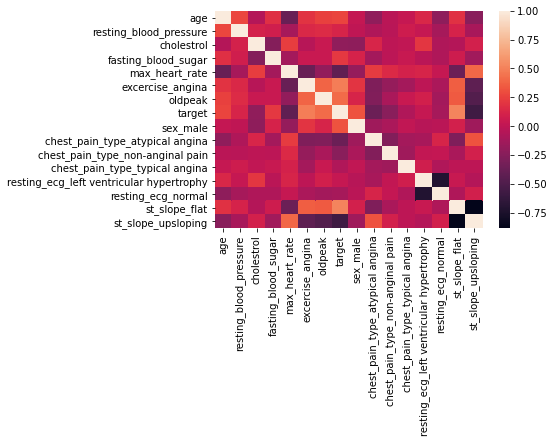

In [56]:
sns.heatmap(corrmat)

In [57]:
x=df.drop(['target'],axis=1)
y=df['target']

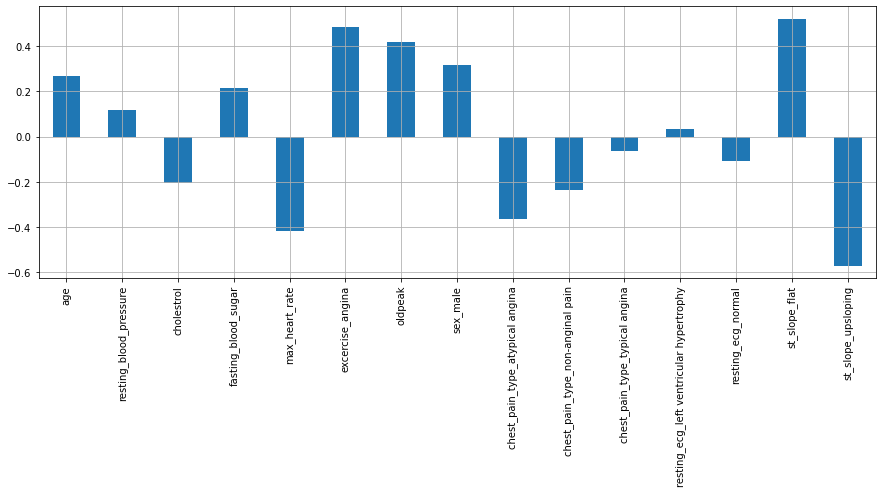

In [58]:
x.corrwith(y).plot.bar(figsize=(15,5),grid=True)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
y_train.value_counts()

1    486
0    442
Name: target, dtype: int64

In [61]:
y_test.value_counts()

1    119
0    114
Name: target, dtype: int64

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 15)
(233, 15)
(928,)
(233,)


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']]=scaler.fit_transform(x_train[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']])


<ipython-input-63-5bb6fa9da6e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']]=scaler.fit_transform(x_train[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
x_train.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
778,0.693878,0.666667,0.496945,0,0.644444,1,0.566667,0,0,0,0,0,1,1,0
836,0.326531,0.380952,0.448065,0,0.762963,0,0.333333,1,1,0,0,0,1,0,1
883,0.326531,0.380952,0.535642,0,0.785185,0,0.333333,1,1,0,0,0,1,0,1
405,0.387755,0.285714,0.000000,1,0.392593,1,0.333333,1,0,1,0,0,1,1,0
709,0.530612,0.419048,0.541752,0,0.311111,1,0.700000,1,0,0,0,1,0,1,0


In [65]:
x_test[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']]=scaler.fit_transform(x_test[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']])


<ipython-input-65-91606062d124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']]=scaler.fit_transform(x_test[['age','resting_blood_pressure','cholestrol','max_heart_rate','oldpeak']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
x_test.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
551,0.521739,0.905882,0.557940,0,0.008197,0,0.613636,1,0,0,0,0,1,1,0
688,0.565217,0.294118,0.759657,0,0.745902,1,0.295455,0,0,0,0,0,1,0,1
591,0.695652,0.482353,0.354077,0,0.500000,0,0.204545,1,1,0,0,0,0,0,1
248,0.369565,0.317647,0.590129,1,0.639344,1,0.613636,1,0,0,0,0,0,0,0
1091,0.260870,0.176471,0.452790,0,0.729508,0,0.159091,1,0,0,0,0,1,0,1


In [67]:
from sklearn import model_selection

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
def modelselection():
    basemodels=[]
    basemodels.append(('lr',LogisticRegression()))
    basemodels.append(('KNN7'  , KNeighborsClassifier(7)))
    basemodels.append(('dct',DecisionTreeClassifier()))
    basemodels.append(('gnb',GaussianNB()))
    basemodels.append(('adb',AdaBoostClassifier()))
    basemodels.append(('rf',RandomForestClassifier()))
    basemodels.append(('rfe',RandomForestClassifier(criterion='entropy')))
    basemodels.append(('et100',ExtraTreesClassifier()))
    basemodels.append(('et1000',ExtraTreesClassifier(n_estimators=1000)))
    return basemodels

In [70]:
def baseline(x_train,y_train,models):
    num_folds=10
    scoring='accuracy'
    seeds=7
    result=[]
    names=[]
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seeds)
        cv_result=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
        result.append(cv_result)
        names.append(name)
        msg="%s: %f (%f)"%(name,cv_result.mean(),cv_result.std())
        print(msg)
        
    return result,msg

In [71]:
models=modelselection()
name,result=baseline(x_train,y_train,models)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


lr: 0.852244 (0.043762)
KNN7: 0.848025 (0.023662)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


dct: 0.871739 (0.035328)
gnb: 0.843665 (0.042197)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


adb: 0.841503 (0.044474)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


rf: 0.922370 (0.029714)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


rfe: 0.922359 (0.026044)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


et100: 0.913745 (0.033500)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


et1000: 0.916982 (0.035493)


In [72]:

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
classification_report(y_test,y_pred)

0.9012875536480687
[[100  14]
 [  9 110]]


'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90       114\n           1       0.89      0.92      0.91       119\n\n    accuracy                           0.90       233\n   macro avg       0.90      0.90      0.90       233\nweighted avg       0.90      0.90      0.90       233\n'

In [73]:
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
classification_report(y_test,y_pred_knn)

0.8326180257510729
[[ 86  28]
 [ 11 108]]


'              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.82       114\n           1       0.79      0.91      0.85       119\n\n    accuracy                           0.83       233\n   macro avg       0.84      0.83      0.83       233\nweighted avg       0.84      0.83      0.83       233\n'

In [74]:
et = ExtraTreesClassifier(n_estimators= 100)
et.fit(x_train,y_train)
y_pred_et = et.predict(x_test)
print(accuracy_score(y_test,y_pred_et))
print(confusion_matrix(y_test,y_pred_et))
classification_report(y_test,y_pred_et)

0.8969957081545065
[[ 98  16]
 [  8 111]]


'              precision    recall  f1-score   support\n\n           0       0.92      0.86      0.89       114\n           1       0.87      0.93      0.90       119\n\n    accuracy                           0.90       233\n   macro avg       0.90      0.90      0.90       233\nweighted avg       0.90      0.90      0.90       233\n'

In [75]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
classification_report(y_test,y_pred_svc)

0.8240343347639485
[[95 19]
 [22 97]]


'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       114\n           1       0.84      0.82      0.83       119\n\n    accuracy                           0.82       233\n   macro avg       0.82      0.82      0.82       233\nweighted avg       0.82      0.82      0.82       233\n'

In [76]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))
classification_report(y_test,y_pred_ada)

0.8540772532188842
[[ 92  22]
 [ 12 107]]


'              precision    recall  f1-score   support\n\n           0       0.88      0.81      0.84       114\n           1       0.83      0.90      0.86       119\n\n    accuracy                           0.85       233\n   macro avg       0.86      0.85      0.85       233\nweighted avg       0.86      0.85      0.85       233\n'

In [77]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
classification_report(y_test,y_pred_dt)

0.8025751072961373
[[93 21]
 [25 94]]


'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.80       114\n           1       0.82      0.79      0.80       119\n\n    accuracy                           0.80       233\n   macro avg       0.80      0.80      0.80       233\nweighted avg       0.80      0.80      0.80       233\n'

In [78]:
from sklearn.feature_selection import chi2,RFE,SelectKBest
from sklearn.preprocessing import MinMaxScaler

In [79]:
x_norm=MinMaxScaler().fit_transform(x)
chi=SelectKBest(chi2,k=10)
chi.fit(x_norm,y)
chi_support=chi.get_support()
features=x.iloc[:,chi_support].columns.tolist()
features

['fasting_blood_sugar',
 'max_heart_rate',
 'excercise_angina',
 'oldpeak',
 'sex_male',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain',
 'resting_ecg_normal',
 'st_slope_flat',
 'st_slope_upsloping']

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(x_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(rfe_feature))

Fitting estimator with 15 features.
['cholestrol', 'max_heart_rate', 'excercise_angina', 'oldpeak', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina', 'st_slope_flat', 'st_slope_upsloping']


In [86]:
from sklearn.feature_selection import SelectFromModel
lr_selector=SelectFromModel(LogisticRegression())
lr_selector.fit(x_norm,y)
lr_support=lr_selector.get_support()
lr_feature=x.loc[:,lr_support].columns.tolist()
lr_feature

['cholestrol',
 'oldpeak',
 'sex_male',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain',
 'chest_pain_type_typical angina',
 'st_slope_flat']

In [87]:
rf_selector=SelectFromModel(RandomForestClassifier())
rf_selector.fit(x_norm,y)
rf_support=rf_selector.get_support()
rf_feature=x.iloc[:,rf_support].columns
rf_feature

Index(['age', 'resting_blood_pressure', 'cholestrol', 'max_heart_rate',
       'excercise_angina', 'oldpeak', 'st_slope_flat', 'st_slope_upsloping'],
      dtype='object')

In [88]:
et_selector=SelectFromModel(ExtraTreesClassifier())
et_selector.fit(x_norm,y)
et_support=et_selector.get_support()
et_feature=x.iloc[:,et_support].columns
et_feature

Index(['age', 'resting_blood_pressure', 'cholestrol', 'max_heart_rate',
       'excercise_angina', 'oldpeak', 'st_slope_flat', 'st_slope_upsloping'],
      dtype='object')

In [96]:
feature=x.columns
feature_selection=pd.DataFrame({'Feature':feature,'chi':chi_support,'RFE':rfe_support,'Logistic regression':lr_support,
                                'Random forest':rf_support,'Extra tree':et_support})
feature_selection['Total']=np.sum(feature_selection,axis=1)
feature_selection=feature_selection.sort_values(['Total','Feature'],ascending=False)
feature_selection.index=range(1,len(feature_selection)+1)
feature_selection.head(11)

,Feature,chi,RFE,Logistic regression,Random forest,Extra tree,Total
1,st_slope_flat,True,True,True,True,True,5
2,oldpeak,True,True,True,True,True,5
3,st_slope_upsloping,True,True,False,True,True,4
4,max_heart_rate,True,True,False,True,True,4
5,excercise_angina,True,True,False,True,True,4
6,cholestrol,False,True,True,True,True,4
7,sex_male,True,True,True,False,False,3
8,chest_pain_type_non-anginal pain,True,True,True,False,False,3
9,chest_pain_type_atypical angina,True,True,True,False,False,3
10,resting_blood_pressure,False,False,False,True,True,2


In [98]:
x= df.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y= df['target']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)

In [101]:
scaler = MinMaxScaler()
x_train[['age','cholestrol','max_heart_rate','oldpeak']] = scaler.fit_transform(x_train[['age','cholestrol','max_heart_rate','oldpeak']])
x_train.head()

<ipython-input-101-f13448ba0642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['age','cholestrol','max_heart_rate','oldpeak']] = scaler.fit_transform(x_train[['age','cholestrol','max_heart_rate','oldpeak']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
778,0.693878,0.496945,0,0.644444,1,0.566667,0,0,1,1,0
836,0.326531,0.448065,0,0.762963,0,0.333333,0,0,1,0,1
883,0.326531,0.535642,0,0.785185,0,0.333333,0,0,1,0,1
405,0.387755,0.000000,1,0.392593,1,0.333333,0,0,1,1,0
709,0.530612,0.541752,0,0.311111,1,0.700000,0,1,0,1,0


In [102]:
x_test[['age','cholestrol','max_heart_rate','oldpeak']] = scaler.fit_transform(x_test[['age','cholestrol','max_heart_rate','oldpeak']])
x_test.head()

<ipython-input-102-6f147e7278f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['age','cholestrol','max_heart_rate','oldpeak']] = scaler.fit_transform(x_test[['age','cholestrol','max_heart_rate','oldpeak']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,cholestrol,fasting_blood_sugar,max_heart_rate,excercise_angina,oldpeak,chest_pain_type_typical angina,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,st_slope_flat,st_slope_upsloping
551,0.521739,0.557940,0,0.008197,0,0.613636,0,0,1,1,0
688,0.565217,0.759657,0,0.745902,1,0.295455,0,0,1,0,1
591,0.695652,0.354077,0,0.500000,0,0.204545,0,0,0,0,1
248,0.369565,0.590129,1,0.639344,1,0.613636,0,0,0,0,0
1091,0.260870,0.452790,0,0.729508,0,0.159091,0,0,1,0,1


In [103]:
models=modelselection()
name,result=baseline(x_train,y_train,models)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


lr: 0.821038 (0.048276)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN7: 0.812412 (0.057233)
dct: 0.868560 (0.030744)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


gnb: 0.824252 (0.058142)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


adb: 0.811314 (0.051460)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


rf: 0.916971 (0.030699)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


rfe: 0.912658 (0.033018)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


et100: 0.909432 (0.035323)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


et1000: 0.914820 (0.030833)
